<a href="https://colab.research.google.com/github/xiekg2020/DL_test/blob/main/3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
%matplotlib inline
import random
import tensorflow as tf
!pip install d2l
from d2l import tensorflow as d2l

In [31]:
def synthetic_data(w, b, num_examples): 
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    #print(tf.reshape(w,(-1,1)))
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features[0]:',features[0],'\nlabel[0]:',labels[0])
#print('features[1]:',features[1],'\nlabel[1]:',labels[1])
#features,labels

features[0]: tf.Tensor([-0.46642792  1.7178922 ], shape=(2,), dtype=float32) 
label[0]: tf.Tensor([-2.5719266], shape=(1,), dtype=float32)


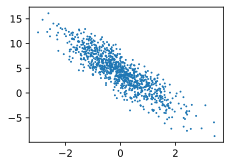

In [32]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1);

In [33]:
def data_iter(batch_size, features, labels):
  num_examples=len(features)
  indices=list(range(num_examples))
  random.shuffle(indices)
  for i in range(0,num_examples, batch_size):
    j=tf.constant(indices[i:min(i+batch_size,num_examples)])
    yield tf.gather(features,j),tf.gather(labels,j)

In [34]:
batch_size=10

for x,y in data_iter(batch_size, features,labels):
  print(x,'\n',y)
  break

tf.Tensor(
[[-2.13497758e+00  7.39243984e-01]
 [ 1.56064630e+00 -6.33365214e-01]
 [-6.88077956e-02  1.45743120e+00]
 [-4.13770348e-01 -3.48488212e-01]
 [-7.53332913e-01 -3.97404373e-01]
 [-4.47198196e-04  1.23666115e-01]
 [ 9.69622061e-02  1.46600330e+00]
 [-6.34968996e-01  9.09439862e-01]
 [ 3.68543476e-01  5.62217012e-02]
 [-2.38293037e-02 -1.07871689e-01]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[-2.5864434 ]
 [ 9.47878   ]
 [-0.8870011 ]
 [ 4.550337  ]
 [ 4.0618477 ]
 [ 3.781499  ]
 [-0.5789747 ]
 [-0.15500966]
 [ 4.7378497 ]
 [ 4.519447  ]], shape=(10, 1), dtype=float32)


In [35]:
w=tf.Variable(tf.random.normal(shape=(2,1),mean=0,stddev=0.01))
b=tf.Variable(tf.zeros(1), trainable=True)

In [36]:
def linreg(x,w,b):
  return tf.matmul(x,w)+b

In [37]:
def squared_loss(y_hat, y):
  return (y_hat-tf.reshape(y,y_hat.shape))**2/2

In [38]:
def sgd(params,grads,lr,batch_size):
  for param,grad in zip(params,grads):
    param.assign_sub(lr*grad/batch_size)

In [41]:
lr=0.01
num_epochs=3
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
  for x,y in data_iter(batch_size, features, labels):
    with tf.GradientTape() as g:
      l=loss(net(x,w,b),y)
    dw,db=g.gradient(l,[w,b])
    sgd([w,b],[dw,db],lr,batch_size)
  train_l=loss(net(features,w,b),labels)
  print(f'epoch {epoch+1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.000047
epoch 2, loss 0.000046
epoch 3, loss 0.000046


In [43]:
print(f'true_w:{true_w} w:{w}')
print(f'true_b:{true_b} b:{b}')
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

true_w:[ 2.  -3.4] w:<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 1.9997545],
       [-3.3997285]], dtype=float32)>
true_b:4.2 b:<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.199807], dtype=float32)>
error in estimating w: [ 0.00024545 -0.00027156]
error in estimating b: [0.00019264]
